<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [26]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [27]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as ss
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [28]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [29]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [30]:
display(boston_df)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


## Objective 1: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels. Following are the tasks.

*   For the "Median value of owner-occupied homes" provide a boxplot
*   Provide a  bar plot for the Charles river variable
*   Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
*   Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
*   Create a histogram for the pupil to teacher ratio variable

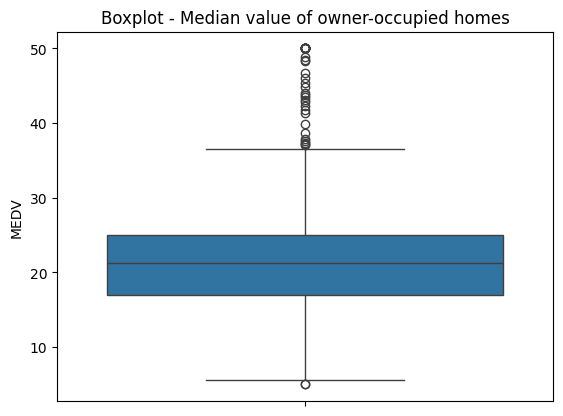

In [31]:
# Task 1 : Boxplot - "Median value - Boxplot"

ax = sns.boxplot(data = boston_df, y = 'MEDV')
ax.set_title('Boxplot - Median value of owner-occupied homes')
pyplot.show()

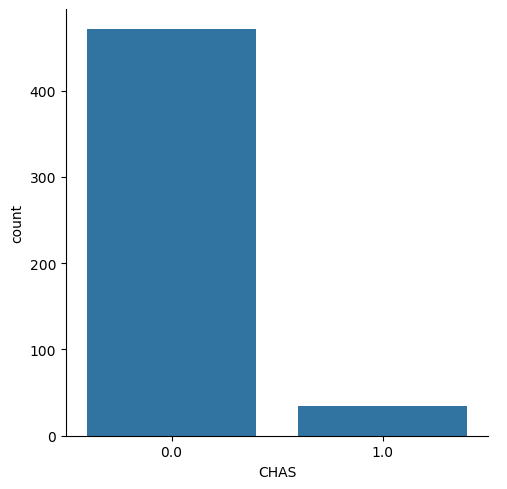

In [32]:
# Task 2 : Boxplot - "Charles River - Boxplot"

ax = sns.catplot(x='CHAS', kind='count', data=boston_df)
ax.set_titles('Bar plot - Charles River')
pyplot.show()

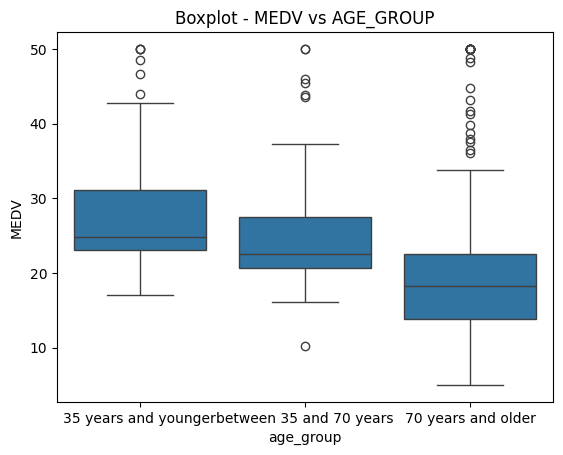

In [33]:
# Task3 - Boxplot for the MEDV variable vs the discretized AGE variable 
# AGE discretized : 35 years and younger, between 35 and 70 years and 70 years and older

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

order_age = ['35 years and younger', 'between 35 and 70 years', '70 years and older']

ax = sns.boxplot(data = boston_df, x = 'age_group', y = 'MEDV', order = order_age)
ax.set_title('Boxplot - MEDV vs AGE_GROUP')
pyplot.show()


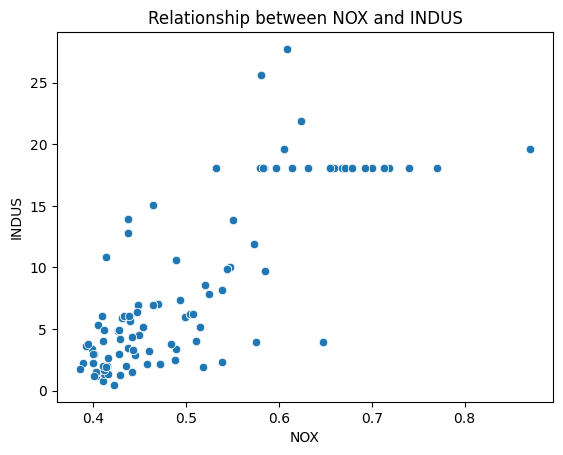

In [34]:
# Task 4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
# What can you say about the relationship?

ax = sns.scatterplot(data = boston_df, x = 'NOX', y = 'INDUS')
ax.set_title('Relationship between NOX and INDUS')
pyplot.show()

# Seems like a positive correlation

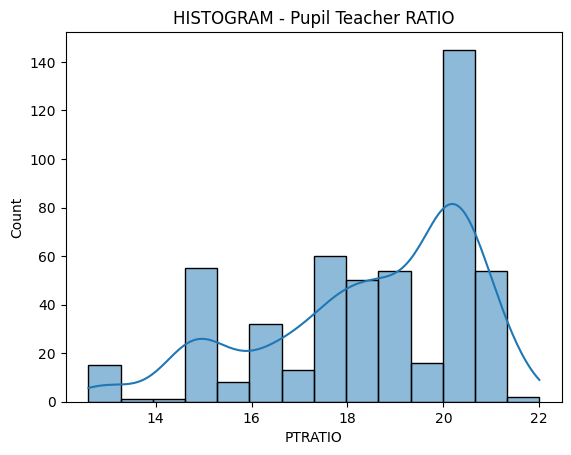

In [35]:
# Task 5 - Create a histogram for the pupil to teacher ratio variable

ax = sns.histplot(data = boston_df, x = 'PTRATIO', kde = True)
ax.set_title('HISTOGRAM - Pupil Teacher RATIO')
pyplot.show()

## Objective 2: Use the appropriate tests to answer the questions provided.

For each of the following questions below:-

*   Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
*   Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
*   Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
*   What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis


Be sure to:

1. State your hypothesis.
2. Use α = 0.05
3. Perform the test Statistics.
4. State the conclusion from the test.

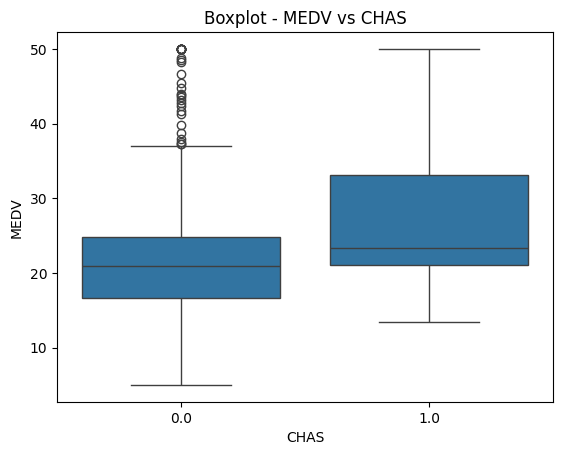

In [36]:
# Task 1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
# H_0 : mean(charles_River) = mean(non_Charles_River) 
# H_1 : mean(charles_River) != mean(non_Charles_River)

# Draw a boxplot of MEDV vs. CHAS

ax = sns.boxplot(data = boston_df, x = 'CHAS', y = 'MEDV')
ax.set_title('Boxplot - MEDV vs CHAS')
pyplot.show()


In [37]:
# Check for variance in both the groups using Levene's test

ss.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

# Since the p-value is less that 0.05, we reject the NULL hypothesis as there is enough evidence to suggest the inequality of variances between the 2 groups.


LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [38]:
# Perform T-test with variance inequality parameter to identify if there is a significant difference in median value of houses bounded by the Charles river or not!

ss.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

# Since the p-value is less that 0.05, we reject the NULL hypothesis as there is enough evidence that suggests the means of median values for houses bounded by Charles river 
# is significantly different that the median vlaues of houses not bounded by Charles River


TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

In [39]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


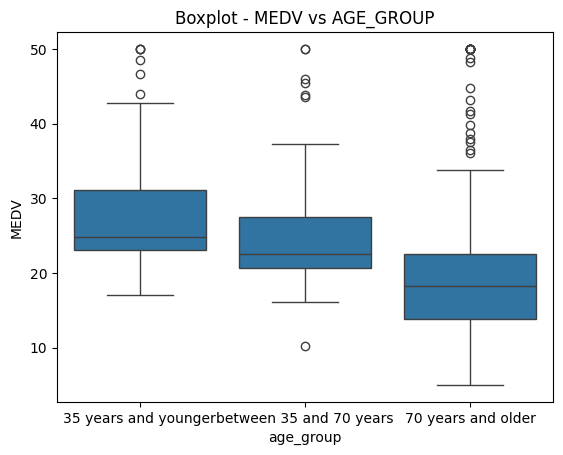

In [40]:
# Task 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

# Draw a boxplot of MEDV to check for the spread across all age groups 

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

order_age = ['35 years and younger', 'between 35 and 70 years', '70 years and older']

ax = sns.boxplot(data = boston_df, x = 'age_group', y = 'MEDV', order = order_age)
ax.set_title('Boxplot - MEDV vs AGE_GROUP')
pyplot.show()


In [41]:
# Perform a one-way ANOVA test to check if the means of the Median values of households across different age groups is statistically different

# H_0 : MEDV_mean(35 years and younger) = MEDV_mean(between 35 and 70 years) = MEDV_mean(70 years and older)
# H_1 : Atleast one of the means between the 3 age groups is different

thirty_five_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirty_five_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_higher = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, p_value = ss.f_oneway(thirty_five_lower, thirty_five_seventy, seventy_higher)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

# Since the p-value is less that 0.05, we reject the NULL hypothesis as there is significant evidence that means of the median household values statistically 
# differ across different age groups.

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [42]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


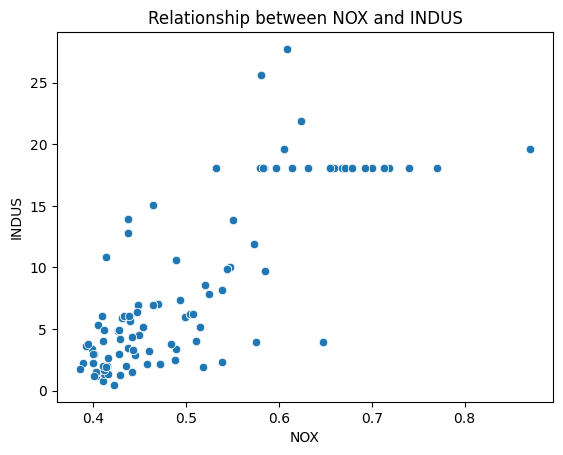

In [43]:
# Task 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

# Create a scatterplot betweem NOX and INDUS to check how the 2 continuous variables move together
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
ax.set_title("Relationship between NOX and INDUS")
pyplot.show()


In [44]:
# Perform peasrson correlation test between NOX and INDUS

# H_0 : Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS) are uncorrelated
# H_1 : A correlation exists between NOX and INDUS

ss.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# There is a strong positive correlation between NOX and INDUS as the pearson correlation coefficient is 0.76 and p-value is less than 0.05.

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

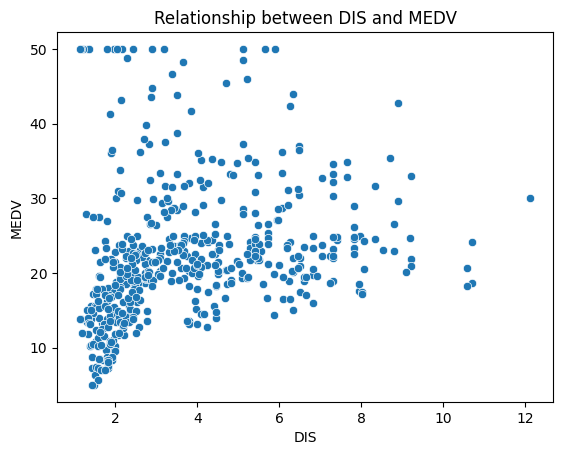

In [45]:
# Task 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

# Create a scatterplot betweem DIS and MEDV to check how the 2 continuous variables move together
ax = sns.scatterplot(x="DIS", y="MEDV", data=boston_df)
ax.set_title("Relationship between DIS and MEDV")
pyplot.show()

In [46]:
# Perform a correlation test to check the movement direction

ss.pearsonr(boston_df['DIS'], boston_df['MEDV'])

# Since the pearson correlation coefiicient is 0.249, we conclude a weak postive correlation exists between DIS and MEDV. Let's run the regression to quantify the
# impact.

PearsonRResult(statistic=0.2499287340859039, pvalue=1.2066117273371074e-08)

In [47]:
# Perform a regression test to quantify the relationship and impacing of DIS on MEDV

# H_0: There is no impact of additional weighted distance to the five Boston employment centres (DIS) on the median value of owner occupied homes (MEDV).
# H_1: There is impact of additional weighted distance to the five Boston employment centres (DIS) on the median value of owner occupied homes (MEDV).

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict()

model.summary()

# For a unit increase in the value of additional weighted distance to the five Boston employment centres (DIS), the median value of owner occupied homes (MEDV)
# increases by 1.0916. Thus a weak positive correlation exists between DIS and MEDV.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        14:28:16   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""